# Advanced Lane Finding Lines

In [52]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import os
%matplotlib inline
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import math
import queue

from  tools import *

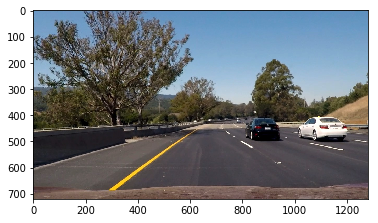

In [53]:
# test if i can show an image
plt.imshow(mpimg.imread(os.path.join("test_images","test6.jpg"))) 

In [54]:
from CameraCalTools import CameraCalibration

# the class CameraCalibration can get the distortion coefficient ,can calcalute the distortion,calculate the 
# perspective transformation ,and also can undistort an distorted image ,can transform an image to bird-likes eye
# and so on

In [55]:
#get  calibration data , the src points and dst points will be show below

cameraCal = CameraCalibration("camera_cal",9,6, os.path.join("test_images","straight_lines2.jpg"))

src points: [[ 287.  670.]
 [ 543.  485.]
 [ 743.  485.]
 [1032.  670.]]
/t
dst points: [[ 187.  720.]
 [ 187.    0.]
 [1082.    0.]
 [1082.  720.]]


In [56]:
# the camera calibration  matrix

cameraCal.mtx

array([[1.15777829e+03, 0.00000000e+00, 6.67113866e+02],
       [0.00000000e+00, 1.15282230e+03, 3.86124658e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Text(0.5,1,'Undistorted')

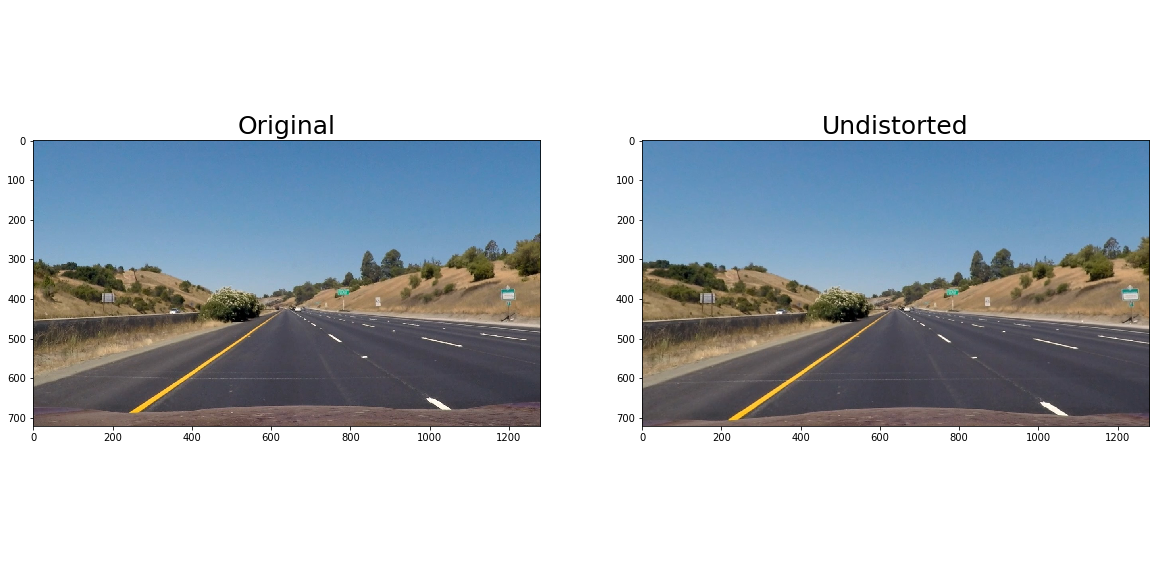

In [57]:
# Test cal data on simple straight line image 
straight_lines = mpimg.imread(os.path.join("test_images","straight_lines1.jpg"))
# First undistort the image
undist = cameraCal.undistort_image(straight_lines)

fig = plt.figure(figsize=(20,10))
plt.axis('off')
ax = fig.add_subplot(1,2,1)
ax.imshow(straight_lines)
ax.set_title("Original",fontsize= 25)
ax = fig.add_subplot(1,2,2)
ax.imshow(undist)
ax.set_title("Undistorted",fontsize =25)

Text(0.5,1,'Undistorted')

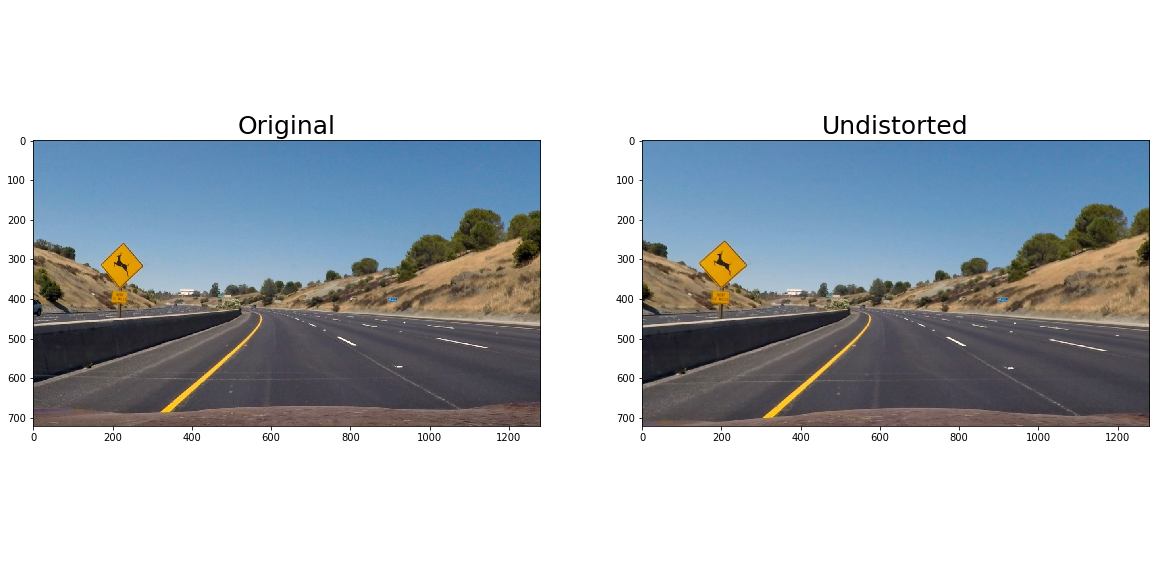

In [58]:
# Test cal data on test image
test_line = mpimg.imread(os.path.join("test_images","test2.jpg"))
# First undistort the image
undist = cameraCal.undistort_image(test_line)

fig = plt.figure(figsize=(20,10))
plt.axis('off')
ax = fig.add_subplot(1,2,1)
ax.imshow(test_line)
ax.set_title("Original",fontsize= 25)
ax = fig.add_subplot(1,2,2)
ax.imshow(undist)
ax.set_title("Undistorted",fontsize =25)

In [59]:
# we get the same shape as the raw image's.
undist.shape

(720, 1280, 3)

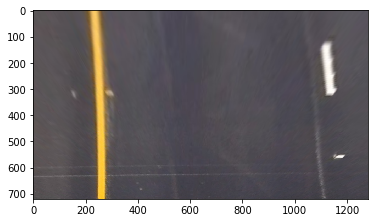

In [60]:
# Apply perspective transform  on  the  undistorted image
transformed_image = cameraCal.warp_to_overhead_perspective(undist)
plt.imshow(transformed_image)

In [61]:

from imageTools import CameraIamge

# the class CameraImage have the ablity to process image on many  ways
# like: grayscale,binary threshold process,combine binary threshold process and apply  pipeline


Text(0.5,1,'Perspective Transform')

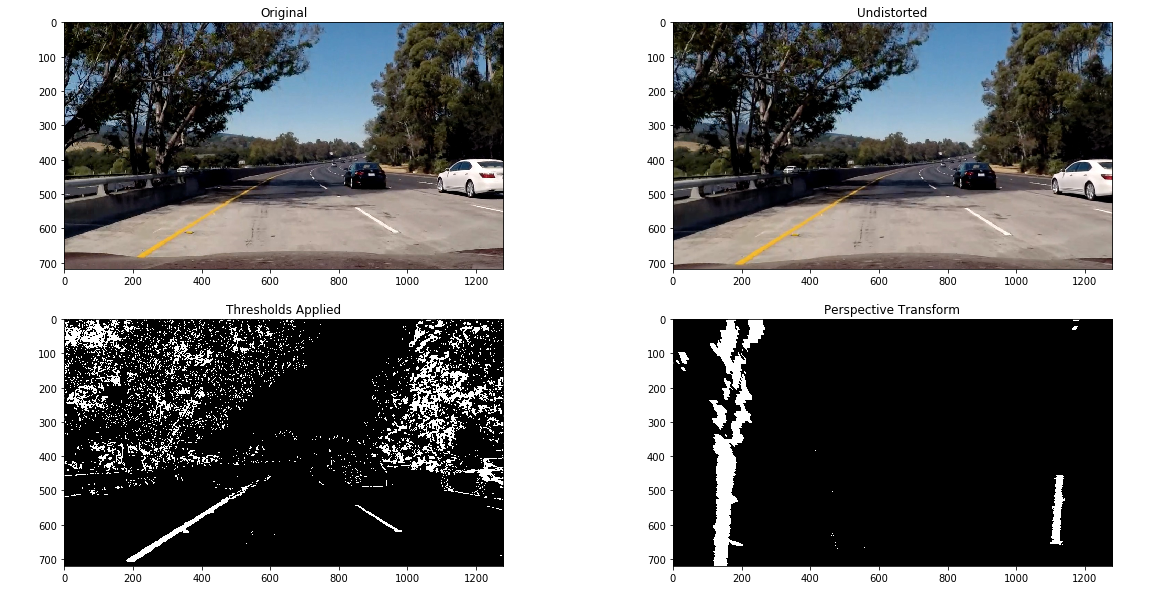

In [62]:


# Grab a sample image

image1 = CameraImage(mpimg.imread(os.path.join("test_images","test5.jpg")), cameraCal)
fig = plt.figure(figsize=(20,10))
plt.axis('off')

ax = fig.add_subplot(2,2,1)
ax.imshow(image1.img)
ax.set_title("Original")

# Undistort

image1.undistort_image()
mpimg.imsave(os.path.join("output_images","undistorted5.jpg"),image1.img)

ax = fig.add_subplot(2,2,2)
ax.imshow(image1.img)
ax.set_title("Undistorted")

# Apply gradient thresholds
image1.apply_threshold()
mpimg.imsave(os.path.join("output_images","gradient_thresholds5.jpg"),image1.img,cmap='gray')

ax = fig.add_subplot(2,2,3)
ax.imshow(image1.img,cmap='gray')
ax.set_title("Thresholds Applied")

# Perspective transform
image1.perspective_transform()
mpimg.imsave(os.path.join("output_images","perspective_warp5.jpg"),image1.img,cmap='gray')

ax = fig.add_subplot(2,2,4)
ax.imshow(image1.img,cmap='gray')
ax.set_title("Perspective Transform")

In [63]:
#
from findLaneTools import *
# the functions in the findLaneTools are those  that help to find lane line piexls ,fit polynomial,combine image 
# and so  on

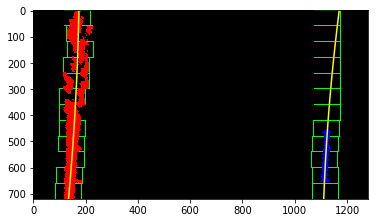

In [64]:
# Find pixels with histogram sliding window
leftx, lefty, rightx, righty, marked_lane_img = find_lane_pixels(image1.img)
left_fitx, right_fitx, ploty, left_fit, right_fit, marked_lane_img = fit_polynomial(image1.img, leftx, lefty, rightx, righty, marked_lane_img, plot_lanes=True )
mpimg.imsave(os.path.join("output_images","test5_lanes_finding.jpg"),marked_lane_img)
plt.imshow(marked_lane_img)

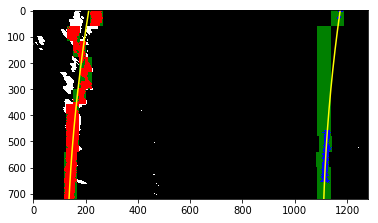

In [65]:
# Find pixels with convoluation method
leftxc, leftyc, rightxc, rightyc, marked_lane_imgc = find_lane_pixels_convolution(image1.img)
left_fitxc, right_fitxc, plotyc, left_fitc, right_fitc, marked_lane_imgc = fit_polynomial(image1.img, leftxc, leftyc, rightxc, rightyc, marked_lane_imgc, plot_lanes=True )
mpimg.imsave(os.path.join("output_images","test5_found_lanes_centoid.jpg"),marked_lane_imgc)
plt.imshow(marked_lane_imgc)

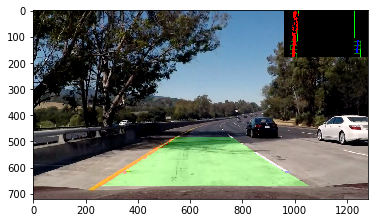

In [66]:
# Show the found results
result = combine_images(image1.img, leftx, lefty, rightx, righty, left_fitx, right_fitx, ploty, image1.original_image, marked_lane_img, cameraCal)
plt.imshow(result)
mpimg.imsave(os.path.join("output_images","test5_final_result.jpg"),result)

In [67]:
y_eval = np.max(ploty)
left_curverad =    ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad =   ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])

print("Left Curve Radius in Pixels: {0}".format(left_curverad))
print("Right Curve Radius in Pixels: {0}".format(right_curverad))

lane_size = right_fitx[0] - left_fitx[-1]
lane_center = lane_size/2 + left_fitx[-1]
dist_from_center_pixels = np.absolute(image1.original_image.shape[1]/2 - lane_center)
print("Distance from lane center in Pixels: {0}".format(dist_from_center_pixels))

Left Curve Radius in Pixels: 9947.894536563164
Right Curve Radius in Pixels: 8014.6495142344
Distance from lane center in Pixels: 12.48540698701595


In [68]:
# Global lane fit data
left_fit_g = None
right_fit_g = None
left_fitx_g = None
right_fitx_g = None
first_frame_g = True

def reset_fit():
    """Reset fit data"""
    global first_frame_g
    first_frame_g = True

def process_image(image):
    """Combine all previous steps into a single image processing pipe to be used to process videos"""    
    
    #Init Cam Image
    camImage = CameraImage(image, cameraCal)
    
    # Apply pipline
    camImage.apply_full_pipeline()
    
    #Global fits
    global left_fit_g
    global right_fit_g
    global left_fitx_g
    global right_fitx_g
    global first_frame_g
    
    # Find Lanes
    if first_frame_g:
        leftx, lefty, rightx, righty, marked_lane_img = find_lane_pixels(camImage.img)
        first_frame_g = False
    else:
        leftx, lefty, rightx, righty, marked_lane_img = search_around_poly(camImage.img, left_fit_g, 
                                                                           right_fit_g, left_fitx_g, right_fitx_g,)
    
    lane_dropped = (leftx.size == 0 or lefty.size == 0 or rightx.size ==0 or righty.size == 0)
    # Fit the found lane info into a polynomial if found
    if lane_dropped:
        #Frame dropped, cannot fit, reset the pipe
        reset_fit()
        ploty = np.linspace(0, camImage.img.shape[0]-1, camImage.img.shape[0] )
    else:
        left_fitx_g, right_fitx_g, ploty, left_fit_g, right_fit_g, marked_lane_img = fit_polynomial(camImage.img, leftx, lefty, rightx, righty, marked_lane_img)
    
    # Combine    
    result = combine_images(camImage.img, leftx, lefty, rightx, righty, left_fitx_g, right_fitx_g, ploty, camImage.original_image, marked_lane_img, cameraCal)

    if not lane_dropped:
        # Calc distance from center 
        lane_size = right_fitx_g[-1] - left_fitx_g[0]
        lane_center = lane_size/2 + left_fitx_g[0]
        dist_from_center_pixels = np.absolute(image1.original_image.shape[1]/2 - lane_center)           
        dist_from_center_meters = dist_from_center_pixels * cameraCal.xm_per_pix        

        #Calc Curve radius in Meters:  
        left_fit_m = np.polyfit(lefty*cameraCal.ym_per_pix, leftx*cameraCal.xm_per_pix, 2)
        right_fit_m = np.polyfit(righty*cameraCal.ym_per_pix, rightx*cameraCal.xm_per_pix, 2)
        y_eval = np.max(ploty)
        left_radius_meters = ((1 + (2*left_fit_m[0]*y_eval*cameraCal.ym_per_pix + left_fit_m[1])**2)**1.5) / np.absolute(2*left_fit_m[0])
        right_radius_meters = ((1 + (2*right_fit_m[0]*y_eval*cameraCal.ym_per_pix + right_fit_m[1])**2)**1.5) / np.absolute(2*right_fit_m[0])

        # Add some text to the screen to print radious and distance information
        cv2.putText(result,"Left radius: %6.4fm" % left_radius_meters, (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1 ,(255,255,255), 2)
        cv2.putText(result,"Right radius: %6.4fm" % right_radius_meters, (10,100), cv2.FONT_HERSHEY_SIMPLEX, 1 ,(255,255,255), 2)
        cv2.putText(result,"Dist from Center: %3.4fm" % dist_from_center_meters, (10,150), cv2.FONT_HERSHEY_SIMPLEX, 1 ,(255,255,255), 2)

    else: 
        cv2.putText(result,"Failed to find lane! Reset triggered...", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1 ,(255,255,255), 2)
        
    return result

In [69]:
# Test the pipeline on a single frame of the project video to verify it works all together

reset_fit()

# Process the project video using the pipeline
output = 'result1.mp4'
clip1 = VideoFileClip("project_video.mp4")
proc_clip = clip1.fl_image(process_image) 
%time proc_clip.write_videofile(output, audio=False)

# Close the video to avoid open handles
clip1.reader.close()
clip1.audio.reader.close_proc()

[MoviePy] >>>> Building video result1.mp4
[MoviePy] Writing video result1.mp4



 12%|█▏        | 152/1261 [01:03<07:45,  2.38it/s]


 24%|██▍       | 303/1261 [02:06<06:38,  2.40it/s]


 36%|███▌      | 454/1261 [03:09<05:37,  2.39it/s]


 48%|████▊     | 605/1261 [04:11<04:33,  2.40it/s]


 60%|█████▉    | 756/1261 [05:13<03:29,  2.41it/s]


 72%|███████▏  | 907/1261 [06:14<02:26,  2.42it/s]


 84%|████████▍ | 1057/1261 [07:18<01:24,  2.41it/s]


 96%|█████████▌| 1205/1261 [08:22<00:23,  2.40it/s]


100%|█████████▉| 1260/1261 [08:45<00:00,  2.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result1.mp4 

CPU times: user 10min 29s, sys: 1min 30s, total: 12min
Wall time: 8min 48s


In [70]:
# Test the pipeline on a single frame of the project video to verify it works all together

reset_fit()

# Process the project video using the pipeline
output = 'result2.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
proc_clip = clip1.fl_image(process_image) 
%time proc_clip.write_videofile(output, audio=False)

# Close the video to avoid open handles
clip1.reader.close()
clip1.audio.reader.close_proc()

[MoviePy] >>>> Building video result2.mp4
[MoviePy] Writing video result2.mp4



 32%|███▏      | 155/485 [01:04<02:16,  2.41it/s]


 64%|██████▎   | 309/485 [02:05<01:11,  2.46it/s]


 95%|█████████▌| 463/485 [03:06<00:08,  2.49it/s]


100%|██████████| 485/485 [03:15<00:00,  2.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result2.mp4 

CPU times: user 3min 52s, sys: 37.7 s, total: 4min 29s
Wall time: 3min 17s


In [71]:
from IPython.display import HTML
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format('result1.mp4'))

In [72]:
from IPython.display import HTML
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format('result2.mp4'))